# Insurance fraud detection

# Data Dictionary

## Categorical Variables

- **Month**: *object*
  - Contains 3-letter abbreviations for the months of the year.
  - Indicates the months in which the accident occurred.

- **WeekOfMonth**: *int64*
  - Provides the week in the month the accident occurred.

- **DayOfWeek**: *object*
  - Contains days of the week.
  - Indicates the days of the week the accident occurred on.

- **Make**: *object*
  - Contains a list of 19 car manufacturers.

- **AccidentArea**: *object*
  - Classifies the area for the accident as "Urban" or "Rural".

- **DayOfWeekClaimed**: *object*
  - Contains the day of the week the claim was filed.
  - Also contains '0'; needs further investigation for missing data.

- **MonthClaimed**: *object*
  - Contains 3-letter abbreviations for the months of the year.
  - Contains '0'; needs further investigation for missing data.

- **WeekOfMonthClaimed**: *int64*
  - Contains weeks in the month that the claim is filed.

- **Sex**: *object*
  - Gender of the individual making the claim.
  - Binary data, convert to 1 or 0.

- **MaritalStatus**: *object*
  - Marital status of the individual making the claim.

- **Fault**: *object*
  - Categorization of who was deemed at fault.
  - Convert to binary, 1 or 0.

- **PolicyType**: *object*
  - Contains two pieces of information:
    - The type of insurance on the car (liability, all perils, collision).
    - Category of the vehicle (sport, sedan, utility).

- **VehicleCategory**: *object*
  - Contains the categorization of the vehicle (see PolicyType).

- **VehiclePrice**: *object*
  - Contains ranges for the value of the vehicle.
  - Replace ranges with the mean value of the range and convert to float.

- **PoliceReportFiled**: *object*
  - Indicates whether a police report was filed for the accident.
  - Convert to binary.

- **WitnessPresent**: *object*
  - Indicates whether a witness was present.
  - Convert to binary.

- **AgentType**: *object*
  - Classifies an agent who is handling the claim as internal vs external.
  - Convert to binary.

- **AddressChange_Claim**: *object*
  - Guess: time from claim was filed to when the person moved (i.e., filed an address change).
  - Replace each interval with the mean value of the range.

- **NumberOfCars**: *object*
  - Guess: number of cars involved in the accident OR the number of cars covered under the policy.
  - Replace each interval with the mean value of the range.

- **BasePolicy**: *object*
  - Type of insurance coverage (see PolicyType).

## Numeric Variables

- **Age**: *int64*
  - Ages of individuals making claims.
  - There is at least one individual with age 0; potential missing data.

- **Deductible**: *int64*
  - The deductible amount (integer values).

- **DriverRating**: *int64*
  - The scale is 1, 2, 3, 4.
  - The name DriverRating implies the data is ordinal; further investigation needed.

- **PolicyNumber**: *int64*
  - The masked policy number, appears to be the same as row number minus 1.

- **RepNumber**: *int64*
  - Rep number is an integer from 1 - 16.

- **FraudFound_P**: *int64*
  - Indicates whether the claim was fraudulent (1) or not (0); target variable.

- **Days_Policy_Accident**: *object*
  - Guess: the number of days between when the policy was purchased and the accident occurred.
  - Each value is a range of values; change these to be the mean of the range and make float.

- **Days_Policy_Claim**: *object*
  - Guess: the number of days that pass between the policy was purchased and the claim was filed.
  - Each value is a range; change these to be the mean of the ranges and make float.

- **PastNumberOfClaims**: *object*
  - Previous number of claims filed by the policy holder (or claimant?).

- **AgeOfVehicle**: *object*
  - Represents the age of the vehicle at the time of the accident.
  - Each value is a range of years; change these to be the mean of the ranges and make float.

- **AgeOfPolicyHolder**: *object*
  - Each value is a range of ages.
  - Change these to be the mean of the ranges and make float.

- **NumberOfSupplements**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.

- **NumberOfSupplements**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.

- **NumberOfSuppliments**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.

- **NumberOfSuppliments**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.
  
- **NumberOfSuppliments**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.


In [1]:
import pandas as pd

file_path = 'fraud_oracle.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check if it's loaded correctly
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [2]:
# Check unique values in the target variable
unique_values = df['FraudFound_P'].unique()
print("Unique values in the target variable (FraudFound_P):", unique_values)



Unique values in the target variable (FraudFound_P): [0 1]


In [3]:
# Check for NaN values in the entire dataset
nan_values = df.isna().sum()
print("\nNaN values in the dataset:")
print(nan_values)



NaN values in the dataset:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


Hence there are no missing values in the dataset

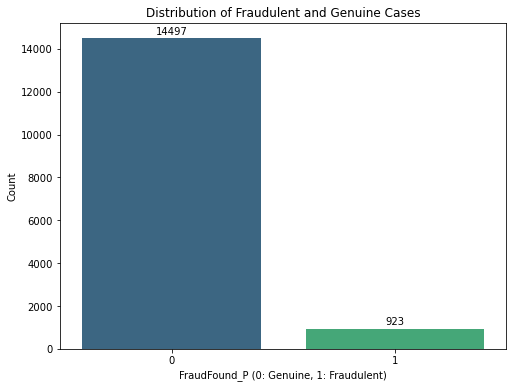

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of 0s and 1s in the target variable
fraud_counts = df['FraudFound_P'].value_counts()

# Plot the counts using a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudFound_P', data=df, palette='viridis')

# Annotate the bars with counts
for i, count in enumerate(fraud_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.title('Distribution of Fraudulent and Genuine Cases')
plt.xlabel('FraudFound_P (0: Genuine, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


In [5]:
# Display the data types of each column
data_types = df.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year        

In [6]:
# Display unique values of each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_values)



Unique values in 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

Unique values in 'WeekOfMonth':
[5 3 2 4 1]

Unique values in 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Unique values in 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

Unique values in 'AccidentArea':
['Urban' 'Rural']

Unique values in 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

Unique values in 'MonthClaimed':
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Unique values in 'WeekOfMonthClaimed':
[1 4 2 3 5]

Unique values in 'Sex':
['Female' 'Male']

Unique values in 'MaritalStatus':
['Single' 'Married' 'Widow' 'Divorced']

Unique values in 'Age':
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 7

In [7]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=[
    'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
    'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
    'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
    'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
    'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
    'NumberOfCars', 'BasePolicy'
], drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_Aug,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,0,1,12,300,1,1994,0,...,0,0,0,0,0,1,0,0,0,1
1,3,4,34,0,2,15,400,4,1994,0,...,0,0,1,0,0,0,0,0,1,0
2,5,2,47,0,3,7,400,3,1994,0,...,0,0,1,0,0,0,0,0,1,0
3,2,1,65,0,4,4,400,2,1994,0,...,0,0,1,0,0,0,0,0,0,1
4,5,2,27,0,5,3,400,1,1994,0,...,0,0,1,0,0,0,0,0,1,0


In [8]:
#Check the new data dypes
data_types = df_encoded.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
WeekOfMonth                 int64
WeekOfMonthClaimed          int64
Age                         int64
FraudFound_P                int64
PolicyNumber                int64
                            ...  
NumberOfCars_3 to 4         uint8
NumberOfCars_5 to 8         uint8
NumberOfCars_more than 8    uint8
BasePolicy_Collision        uint8
BasePolicy_Liability        uint8
Length: 125, dtype: object


## Split the data into test and train

In [9]:
#Split the data into test and train
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop('FraudFound_P', axis=1)
y = df_encoded['FraudFound_P']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (12336, 124)
Shape of X_test: (3084, 124)
Shape of y_train: (12336,)
Shape of y_test: (3084,)


In [10]:
# Check for missing values in the training set
missing_values_train = X_train.isnull().sum()
print("Missing values in the training set:")
print(missing_values_train)


Missing values in the training set:
WeekOfMonth                 0
WeekOfMonthClaimed          0
Age                         0
PolicyNumber                0
RepNumber                   0
                           ..
NumberOfCars_3 to 4         0
NumberOfCars_5 to 8         0
NumberOfCars_more than 8    0
BasePolicy_Collision        0
BasePolicy_Liability        0
Length: 124, dtype: int64


## Decision Tree classifier

Accuracy with Decision Tree: 0.9150453955901426

AUC Score with Decision Tree: 0.6495545408350755

Classification Report with Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2887
           1       0.34      0.35      0.34       197

    accuracy                           0.92      3084
   macro avg       0.65      0.65      0.65      3084
weighted avg       0.92      0.92      0.92      3084


Confusion Matrix with Decision Tree:
[[2754  133]
 [ 129   68]]


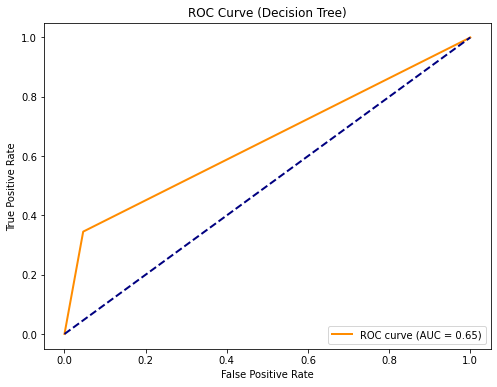

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training set
dt_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_dt = dt_model.predict(X_test)

# Calculate AUC score for Decision Tree model
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
auc_score_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_result_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display evaluation metrics for Decision Tree model
print("Accuracy with Decision Tree:", accuracy_dt)
print("\nAUC Score with Decision Tree:", auc_score_dt)
print("\nClassification Report with Decision Tree:")
print(classification_report_result_dt)
print("\nConfusion Matrix with Decision Tree:")
print(conf_matrix_dt)

# Plot ROC Curve for Decision Tree model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


In [29]:
## Hyperparameter tuning of Decision Tree classifier

Best Hyperparameters (Decision Tree): {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

AUC Score (Best Decision Tree): 0.8404338369621214


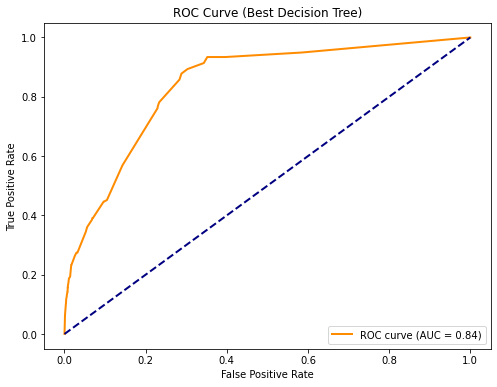


Accuracy (Best Decision Tree): 0.938715953307393

Classification Report (Best Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2887
           1       0.57      0.16      0.25       197

    accuracy                           0.94      3084
   macro avg       0.76      0.57      0.61      3084
weighted avg       0.92      0.94      0.92      3084


Confusion Matrix (Best Decision Tree):
[[2864   23]
 [ 166   31]]


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, scoring='roc_auc', cv=3)

# Perform Grid Search on the training set
grid_search_dt.fit(X_train, y_train)

# Display the best hyperparameters for Decision Tree
print("Best Hyperparameters (Decision Tree):", grid_search_dt.best_params_)

# Get the best Decision Tree model from the grid search
best_model_dt = grid_search_dt.best_estimator_

# Predictions on the testing set using the best model
y_pred_best_dt = best_model_dt.predict(X_test)
y_pred_proba_best_dt = best_model_dt.predict_proba(X_test)[:, 1]

# Calculate AUC score for the best Decision Tree model
auc_score_best_dt = roc_auc_score(y_test, y_pred_proba_best_dt)
print("\nAUC Score (Best Decision Tree):", auc_score_best_dt)

# Plot ROC Curve for the best Decision Tree model
fpr_best_dt, tpr_best_dt, _ = roc_curve(y_test, y_pred_proba_best_dt)
roc_auc_best_dt = auc(fpr_best_dt, tpr_best_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_dt, tpr_best_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_best_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Best Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Evaluate the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
classification_report_best_dt = classification_report(y_test, y_pred_best_dt)
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)

# Display evaluation metrics for the best Decision Tree model
print("\nAccuracy (Best Decision Tree):", accuracy_best_dt)
print("\nClassification Report (Best Decision Tree):")
print(classification_report_best_dt)
print("\nConfusion Matrix (Best Decision Tree):")
print(conf_matrix_best_dt)


## threshold adjustment


Accuracy (Best Decision Tree, Threshold Adjusted): 0.9069390402075227

Classification Report (Best Decision Tree, Threshold Adjusted):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2887
           1       0.31      0.36      0.33       197

    accuracy                           0.91      3084
   macro avg       0.63      0.65      0.64      3084
weighted avg       0.91      0.91      0.91      3084


Confusion Matrix (Best Decision Tree, Threshold Adjusted):
[[2726  161]
 [ 126   71]]

AUC Score (Best Decision Tree, Threshold Adjusted): 0.6523194294746799


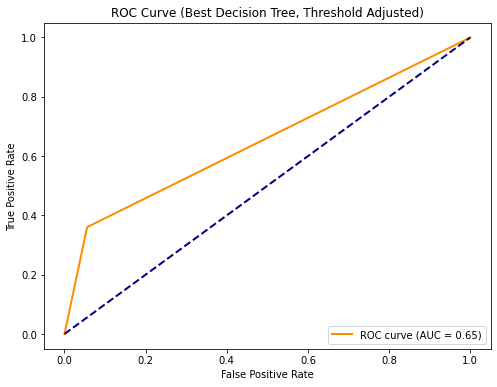

In [15]:
import numpy as np
from sklearn.metrics import precision_recall_curve


# Find the threshold that maximizes F1-score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_best_dt)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Adjust predictions based on the optimal threshold
y_pred_threshold_adjusted_dt = (y_pred_proba_best_dt >= optimal_threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy_threshold_adjusted_dt = accuracy_score(y_test, y_pred_threshold_adjusted_dt)
classification_report_threshold_adjusted_dt = classification_report(y_test, y_pred_threshold_adjusted_dt)
conf_matrix_threshold_adjusted_dt = confusion_matrix(y_test, y_pred_threshold_adjusted_dt)

# Display evaluation metrics with threshold adjustment
print("\nAccuracy (Best Decision Tree, Threshold Adjusted):", accuracy_threshold_adjusted_dt)
print("\nClassification Report (Best Decision Tree, Threshold Adjusted):")
print(classification_report_threshold_adjusted_dt)
print("\nConfusion Matrix (Best Decision Tree, Threshold Adjusted):")
print(conf_matrix_threshold_adjusted_dt)

# Calculate AUC score after threshold adjustment
roc_auc_threshold_adjusted_dt = roc_auc_score(y_test, y_pred_threshold_adjusted_dt)
print("\nAUC Score (Best Decision Tree, Threshold Adjusted):", roc_auc_threshold_adjusted_dt)

# Plot ROC Curve after threshold adjustment
fpr_threshold_adjusted_dt, tpr_threshold_adjusted_dt, _ = roc_curve(y_test, y_pred_threshold_adjusted_dt)
roc_auc_threshold_adjusted_dt = auc(fpr_threshold_adjusted_dt, tpr_threshold_adjusted_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_threshold_adjusted_dt, tpr_threshold_adjusted_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_threshold_adjusted_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Best Decision Tree, Threshold Adjusted)')
plt.legend(loc="lower right")
plt.show()


## XGBoost

### Initial model

## XGBoost

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the XGBoost model on the training set
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate AUC score for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_result_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display evaluation metrics for XGBoost model
print("Accuracy with XGBoost:", accuracy_xgb)
print("\nAUC Score with XGBoost:", auc_score_xgb)
print("\nClassification Report with XGBoost:")
print(classification_report_result_xgb)
print("\nConfusion Matrix with XGBoost:")
print(conf_matrix_xgb)


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with XGBoost: 0.958171206225681

AUC Score with XGBoost: 0.9760558006396608

Classification Report with XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2887
           1       0.85      0.42      0.56       197

    accuracy                           0.96      3084
   macro avg       0.91      0.71      0.77      3084
weighted avg       0.95      0.96      0.95      3084


Confusion Matrix with XGBoost:
[[2873   14]
 [ 115   82]]


## XGBoost with SMOTE


In [18]:

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize XGBoost model without hyperparameter tuning
xgb_model_smote = xgb.XGBClassifier(random_state=42)

# Fit the model on the SMOTE-oversampled training set
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Predictions on the testing set
y_pred_xgb_smote = xgb_model_smote.predict(X_test)
y_pred_proba_xgb_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

# Calculate AUC score for the XGBoost model with SMOTE
auc_score_xgb_smote = roc_auc_score(y_test, y_pred_proba_xgb_smote)

# Display evaluation metrics for the XGBoost model with SMOTE
print("Accuracy with XGBoost and SMOTE:", accuracy_score(y_test, y_pred_xgb_smote))
print("AUC Score with XGBoost and SMOTE:", auc_score_xgb_smote)
print("Classification Report with XGBoost and SMOTE:")
print(classification_report(y_test, y_pred_xgb_smote))
print("Confusion Matrix with XGBoost and SMOTE:")
print(confusion_matrix(y_test, y_pred_xgb_smote))




D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with XGBoost and SMOTE: 0.9471465629053177
AUC Score with XGBoost and SMOTE: 0.9571209289322518
Classification Report with XGBoost and SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2887
           1       0.74      0.27      0.39       197

    accuracy                           0.95      3084
   macro avg       0.84      0.63      0.68      3084
weighted avg       0.94      0.95      0.94      3084

Confusion Matrix with XGBoost and SMOTE:
[[2868   19]
 [ 144   53]]


### Gave worse results. So we continue WITHOUT doing SMOTE oversampling for XGBoost

## Hyperparameter tuning of XGBoost.


In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Perform grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predictions on the testing set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate AUC score for the best XGBoost model
y_pred_proba_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
auc_score_best_xgb = roc_auc_score(y_test, y_pred_proba_best_xgb)

# Evaluate the best XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
classification_report_result_best_xgb = classification_report(y_test, y_pred_best_xgb)
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Display evaluation metrics for the best XGBoost model
print("\nAccuracy with Best XGBoost Model:", accuracy_best_xgb)
print("AUC Score with Best XGBoost Model:", auc_score_best_xgb)
print("Classification Report with Best XGBoost Model:")
print(classification_report_result_best_xgb)
print("Confusion Matrix with Best XGBoost Model:")
print(conf_matrix_best_xgb)


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Accuracy with Best XGBoost Model: 0.9578469520103762
AUC Score with Best XGBoost Model: 0.9780180363927918
Classification Report with Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2887
           1       0.83      0.43      0.56       197

    accuracy                           0.96      3084
   macro avg       0.90      0.71      0.77      3084
weighted avg       0.95      0.96      0.95      3084

Confusion Matrix with Best XGBoost Model:
[[2870   17]
 [ 113   84]]


In [22]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate AUC score for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Extract feature importances
feature_importance = xgb_model.feature_importances_

# Display the top N most important features
top_n = 10
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(top_n)

# Print the top features
print("Top Features:")
print(top_features)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_result_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display evaluation metrics for XGBoost model
print("\nAccuracy with XGBoost:", accuracy_xgb)
print("\nAUC Score with XGBoost:", auc_score_xgb)
print("\nClassification Report with XGBoost:")
print(classification_report_result_xgb)
print("\nConfusion Matrix with XGBoost:")
print(conf_matrix_xgb)


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Top Features:
                              Feature  Importance
67                  Fault_Third Party    0.102871
123              BasePolicy_Liability    0.069730
114  AddressChange_Claim_2 to 3 years    0.037136
11                          Month_Jan    0.028477
18                          Month_Sep    0.024071
55                   MonthClaimed_Jan    0.021223
17                          Month_Oct    0.019181
61                   MonthClaimed_Oct    0.018086
57                   MonthClaimed_Jun    0.017282
71       PolicyType_Sport - Collision    0.016417

Accuracy with XGBoost: 0.9561175961954173

AUC Score with XGBoost: 0.9704086292672477

Classification Report with XGBoost:
              precision    recall  f1-score   support

     

## Trying out different thresholds and finding the best balance at 0.1

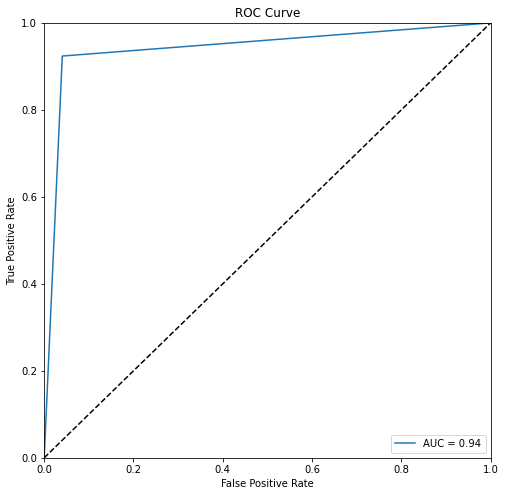


Accuracy of XGB with Adjusted Threshold 0.9571984435797666
AUC Score of XGB with Adjusted Threshold: 0.9416656849626982
Classification Report of XGB with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2887
           1       0.61      0.92      0.73       197

    accuracy                           0.96      3084
   macro avg       0.80      0.94      0.86      3084
weighted avg       0.97      0.96      0.96      3084

Confusion Matrix of XGB with Adjusted Threshold:
[[2770  117]
 [  15  182]]


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


# Adjust the threshold
new_threshold_more = 0.1
y_pred_proba_best_xgb_adj_more = (best_xgb_model.predict_proba(X_test)[:, 1] >= new_threshold_more).astype(int)

# Evaluate the adjusted XGBoost model with the new threshold
accuracy_best_xgb_adj_more = accuracy_score(y_test, y_pred_proba_best_xgb_adj_more)
classification_report_result_best_xgb_adj_more = classification_report(y_test, y_pred_proba_best_xgb_adj_more)
conf_matrix_best_xgb_adj_more = confusion_matrix(y_test, y_pred_proba_best_xgb_adj_more)
auc_score_best_xgb_adj_more = roc_auc_score(y_test, y_pred_proba_best_xgb_adj_more)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best_xgb_adj_more)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score_best_xgb_adj_more:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display evaluation metrics for the adjusted XGBoost model with the new threshold
print("\nAccuracy of XGB with Adjusted Threshold", accuracy_best_xgb_adj_more)
print("AUC Score of XGB with Adjusted Threshold:", auc_score_best_xgb_adj_more)
print("Classification Report of XGB with Adjusted Threshold:")
print(classification_report_result_best_xgb_adj_more)
print("Confusion Matrix of XGB with Adjusted Threshold:")
print(conf_matrix_best_xgb_adj_more)


## Feature Importance

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Top Features:
                              Feature  Importance
67                  Fault_Third Party    0.107109
123              BasePolicy_Liability    0.090853
114  AddressChange_Claim_2 to 3 years    0.038881
10                          Month_Feb    0.024034
99                   AgeOfVehicle_new    0.022608
11                          Month_Jan    0.021743
55                   MonthClaimed_Jan    0.021444
14                          Month_Mar    0.019503
18                          Month_Sep    0.019457
3                        PolicyNumber    0.018574


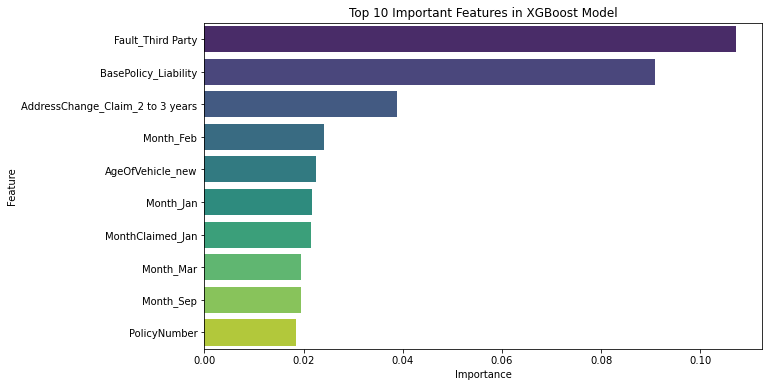

In [23]:
# To find out the top 10 features in predicting the target variable.
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate AUC score for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Extract feature importances
feature_importance = xgb_model.feature_importances_

# Display the top N most important features
top_n = 10
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(top_n)

# Print the top features
print("Top Features:")
print(top_features)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features in XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

